# Continuous MH Sampler

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Model: N - Dimensional Normal distribution with Unknown Mean
Here, we assume our $(N\times1)$ vectors are independent and normally distributed. The variances are known, while the means are not. Thus, the prior and posterior are over the mean. We attempt to sample from our posterior using the simple Metropolis Hastings algorithm.

First, we produce our data:

In [2]:
np.random.seed(np.random.randint(2**32))
D = int(5)

mu_0 = np.array(np.random.randint(10,size=D).astype(float))
var_0 = np.array(np.random.randint(low=1,high=5,size=D).astype(float))

data = np.random.multivariate_normal(mean = mu_0, cov = np.diag(var_0), size = 20)
mu_sample = data.mean(axis=0)
var_sample = data.var(axis=0)

print(f'Data shape: {data.shape}\nData mean: {mu_sample}\nData variance: {var_sample}')

Data shape: (20, 5)
Data mean: [8.27964691 0.56113557 1.43271095 7.60981687 5.65688831]
Data variance: [1.41231156 1.33893906 1.43212987 1.84320182 1.4217266 ]


In [3]:
class MultivariateNormal:
    def __init__(self,data,var_0): #shape of data is (N,D) with N samples of D-dimensional vectors
        self.data = data
        self.var_0 = var_0
        self.mu_sample = self.data.mean(axis=0)
        self.var_sample = self.data.var(axis=0)

    def logpdf(self, x):
        return (norm(x['mu_trial'],self.var_0).logpdf(self.data)).sum(axis=0)

Instantiating the model:

In [4]:
NGauss = MultivariateNormal(data,var_0)
print(NGauss.mu_sample)
print(NGauss.var_sample)
print(NGauss.data.shape)

[8.27964691 0.56113557 1.43271095 7.60981687 5.65688831]
[1.41231156 1.33893906 1.43212987 1.84320182 1.4217266 ]
(20, 5)


# Trial

In [5]:
from bayesian_inference.MHSampler import MHSampler

initial_position = {'mu_trial': np.random.rand(D)} # starting point of the MH sampler
problem = MHSampler(NGauss, initial_position)
result = problem.run(1000)

posterior, acceptance_rates = result[0], result[1]

In [6]:
# posterior = np.array(posterior)
print(posterior.shape)

(1001, 5)


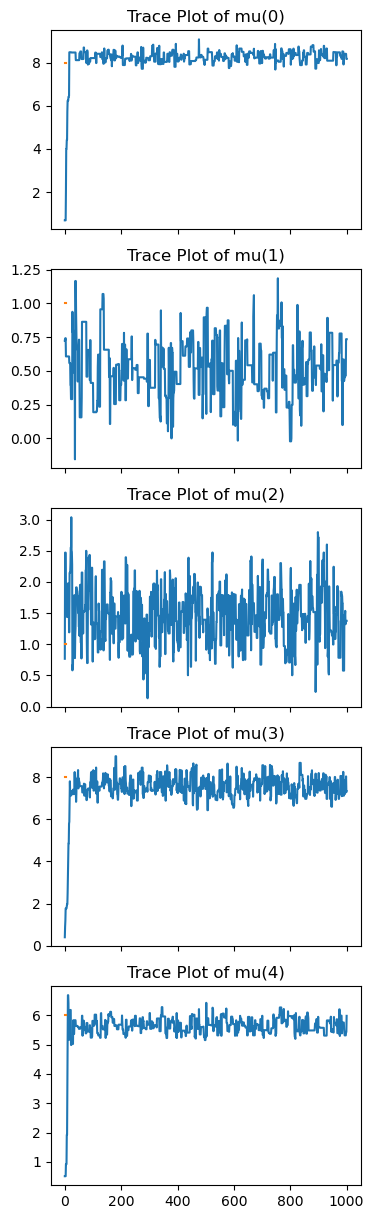

In [7]:
# single run
figure, axes = plt.subplots(D, sharex = True, figsize = (4,D*3))
for i in range(D):
    axes[i].plot(posterior[:,i])
    axes[i].plot(mu_0[i]*np.ones(posterior[0].shape[0]))
    axes[i].set_title(f'Trace Plot of mu({i})')

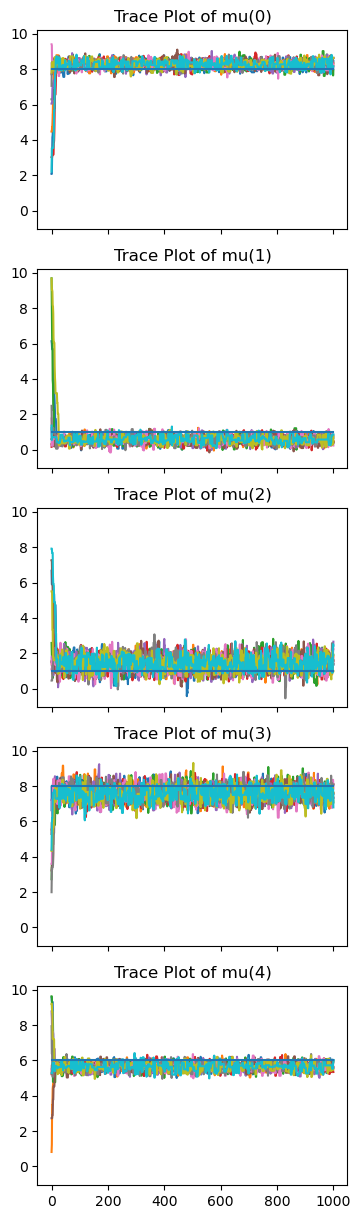

In [8]:
# Multiple runs
# from bayesian_inference import MHSampler

initial_guesses = 10*np.random.rand(10,D)
posteriors = []
acceptance_rates = []

for i in range(10):
    initial_position = {'mu_trial': initial_guesses[i,:]} # starting point of the NUTS sampler
    problem = MHSampler(NGauss, initial_position)
    result = problem.run(1000)
    posteriors.append(result[0])
    acceptance_rates.append(result[1])

figure, axes = plt.subplots(D, sharex = True, sharey = True, figsize = (4,D*3))
for i in range(D):
    for j in range(10):
        axes[i].plot(posteriors[j][:,i])
    axes[i].plot(mu_0[i]*np.ones(posteriors[0].shape[0]))
    axes[i].set_title(f'Trace Plot of mu({i})')